<a href="https://colab.research.google.com/github/soumodeep60/Python/blob/main/SD_heart_diesase_prediction_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

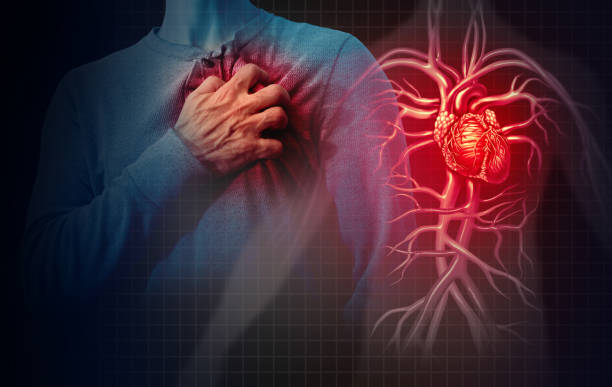

##Problem statement: 
- Design a predictive model with the use of machine learning algorithms to predict whether any person had any chance of heart diease or not.

##Loading dataset for work

Data information:
- This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

**Attribute Information:**

age\
sex\
chest pain type (4 values)\
resting blood pressure\
serum cholestoral in mg/dl\
fasting blood sugar > 120 mg/dl\
resting electrocardiographic results (values 0,1,2)\
maximum heart rate achieved\
exercise induced angina\
oldpeak = ST depression induced by exercise relative to rest\
the slope of the peak exercise ST segment\
number of major vessels (0-3) colored by flourosopy\
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect\

In [ ]:
 # mounted google drive to colab
 from google.colab import drive
 drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
 # loading the dadasets available 
 !ls "/content/drive/My Drive/datasets/"
 filepath = "/content/drive/My Drive/datasets/"

 BigBasket.csv
 BigBazaar.csv
 City_pop.csv
 CO2_emission.csv
 diabetes_012_health_indicators_BRFSS2015.csv
 fips-unemp-16.csv
'GDP world.csv'
'heart attack.csv'
 heart.csv
 House_Rent_Dataset.csv
 India_Menu.csv
'Loan data.csv'
 Mall_Customers.csv
 news.csv
'rainfall in india 1901-2015.csv'
 seattleWeather_1948-2017.csv
'Total reserve.csv'


In [ ]:
# importing pandas 
import pandas as pd
df = pd.read_csv(filepath + 'heart attack.csv')

In [ ]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# data types
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# cloning dataframe
df2=df

# EDA

In [ ]:
# importing required libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
# sns.set_style('darkgrid')

In [ ]:
# columns
df2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# overview of data
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df2.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# basic statistics 
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# data shape
df2.shape

(1025, 14)

## Visualizations and distributions

Age

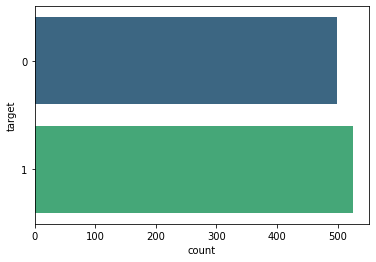

In [ ]:
sns.countplot(y = 'target', data=df2, palette='viridis')

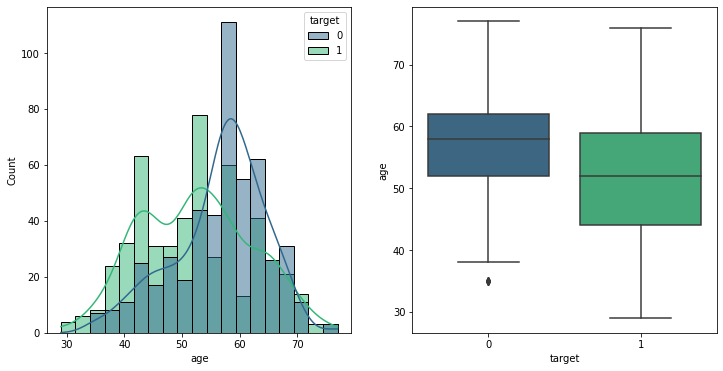

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.histplot(x='age', data=df2, kde=True, hue='target', palette = 'viridis',ax=ax[0])
sns.boxplot(x='target', data=df2, y='age', palette = 'viridis',ax=ax[1])

Sex

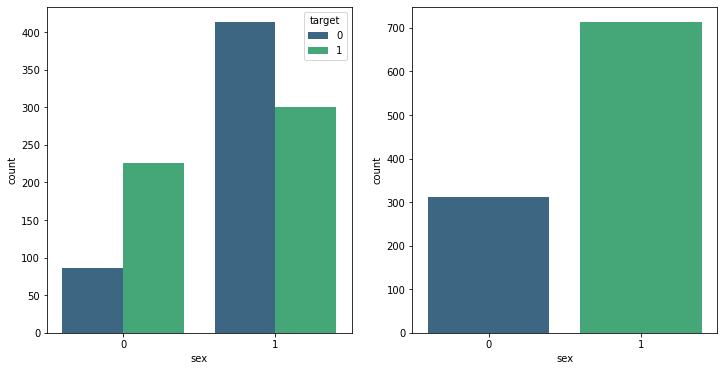

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='sex', data=df2, hue='target', palette = 'viridis',ax=ax[0])
sns.countplot(x='sex', data=df2, palette = 'viridis',ax=ax[1])

Chest pain

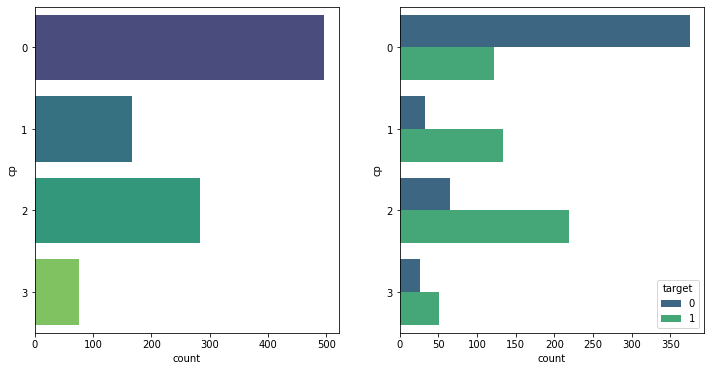

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.countplot(y = 'cp', data=df2, palette='viridis',ax=ax[0])
sns.countplot(y = 'cp', data=df2, hue='target',palette='viridis',ax=ax[1])

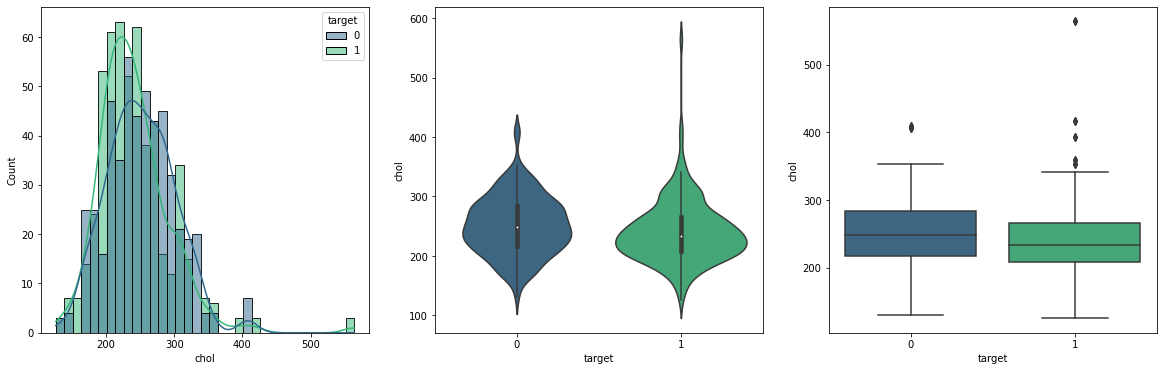

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,6))
sns.histplot(x='chol',data=df2, hue='target', kde=True, palette = 'viridis', ax=ax[0])
sns.violinplot(x = 'target', data = df2, y = 'chol', palette = 'viridis',ax=ax[1])
sns.boxplot(x = 'target', data = df2, y = 'chol', palette = 'viridis', ax = ax[2])

Fasting Blood Sugar

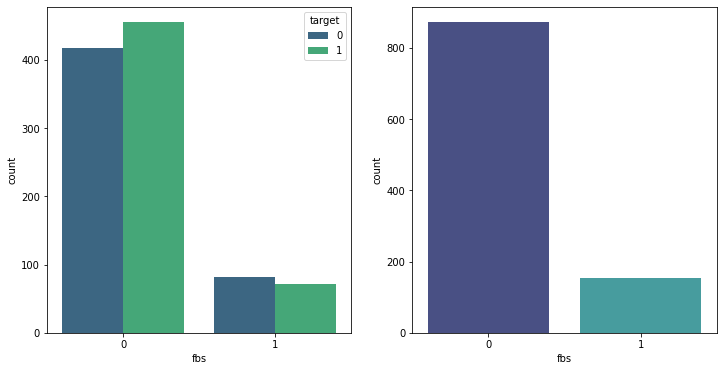

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='fbs', data=df2, hue='target', palette='viridis', ax=ax[0])
sns.countplot(x='fbs', data=df2, palette='mako', ax=ax[1])

Resting Electrocardiographic Result

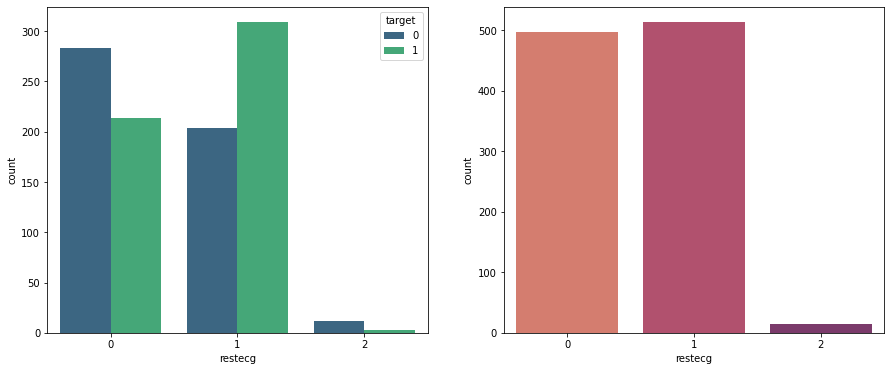

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(x='restecg', data=df2, hue='target', palette='viridis', ax=ax[0])
sns.countplot(x='restecg', data=df2, palette='flare', ax=ax[1])

Maximum Heart Rate Achieved

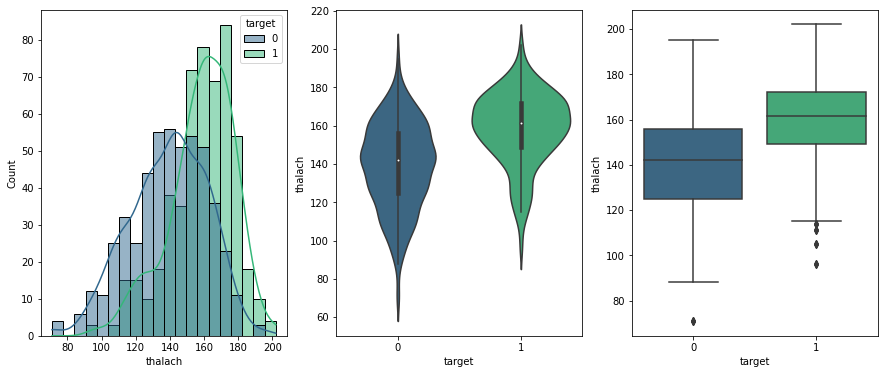

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
sns.histplot(x='thalach',data=df2, hue='target', kde=True, palette = 'viridis', ax=ax[0])
sns.violinplot(x = 'target', data = df2, y = 'thalach', palette = 'viridis', ax=ax[1])
sns.boxplot(x = 'target', data = df2, y = 'thalach', palette = 'viridis', ax = ax[2])

Exercise Induced Angina

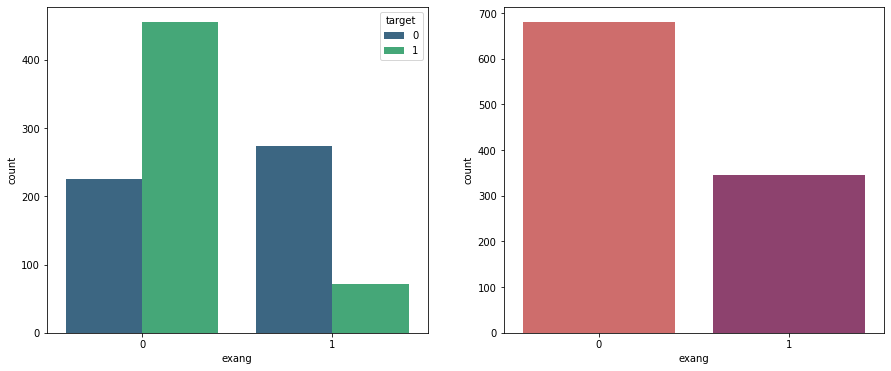

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(x='exang', data=df2, hue='target', palette='viridis', ax=ax[0])
sns.countplot(x='exang', data=df2, palette='flare', ax=ax[1])

Previous Peak

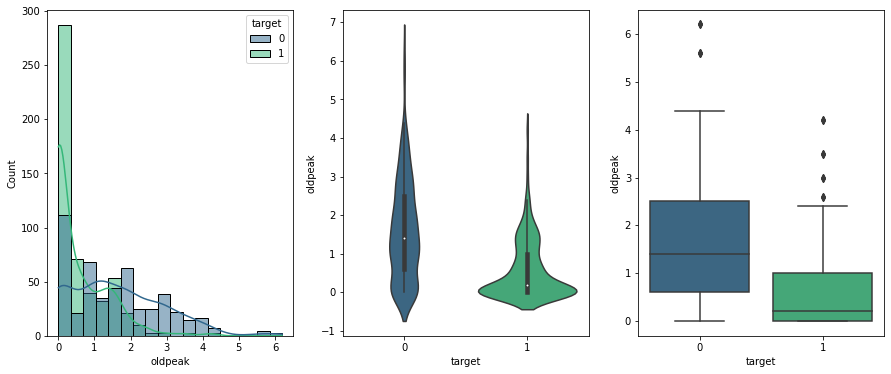

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
sns.histplot(x='oldpeak',data=df2, hue='target', kde=True, palette = 'viridis', ax=ax[0])
sns.violinplot(x = 'target', data = df2, y = 'oldpeak', palette = 'viridis', ax=ax[1])
sns.boxplot(x = 'target', data = df2, y = 'oldpeak', palette = 'viridis', ax = ax[2])

Slope

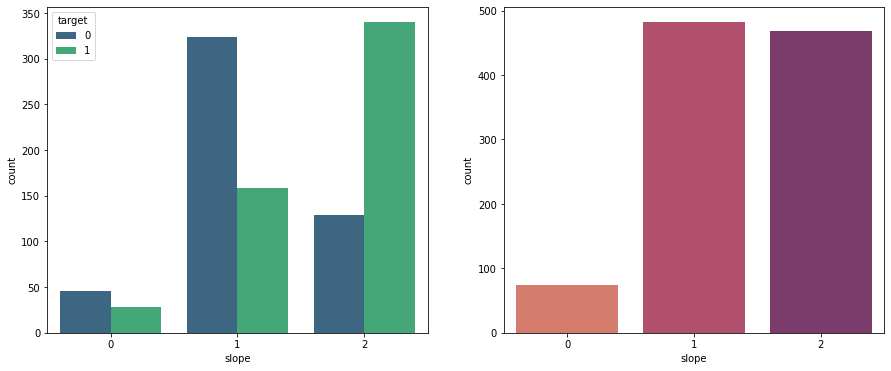

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(x='slope', data=df2, hue='target',palette='viridis', ax=ax[0])
sns.countplot(x='slope', data=df2, palette='flare', ax=ax[1])

Number of Major Vessels

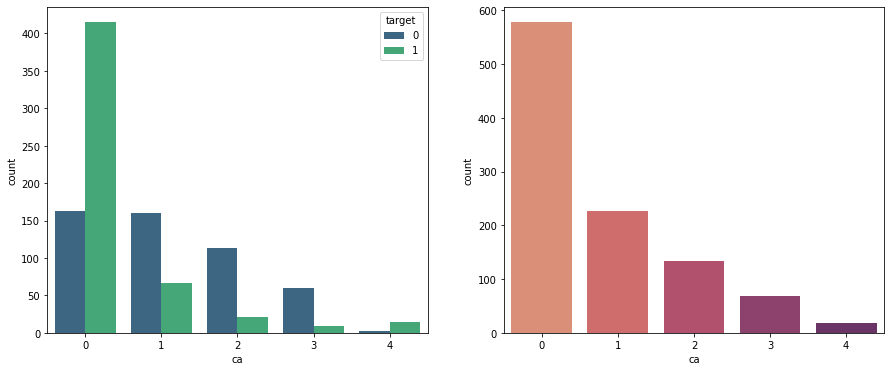

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(x='ca', data=df2, hue='target', palette='viridis', ax=ax[0])
sns.countplot(x='ca', data=df2, palette='flare', ax=ax[1])

Thal Rate

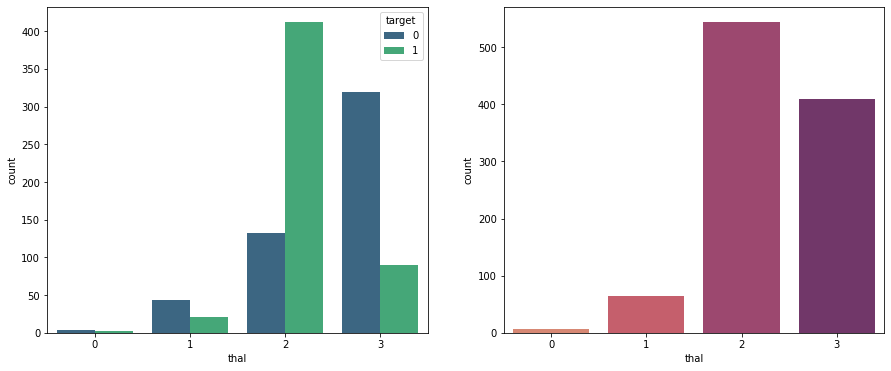

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(x='thal', data=df2, hue='target',palette='viridis', ax=ax[0])
sns.countplot(x='thal', data=df2, palette='flare', ax=ax[1])

# Modeling

In [ ]:
# !pip install catboost
# !pip install shap

In [ ]:
# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Feature Importance
# import shap


In [ ]:
df2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df2 = df2.reset_index(drop=True)

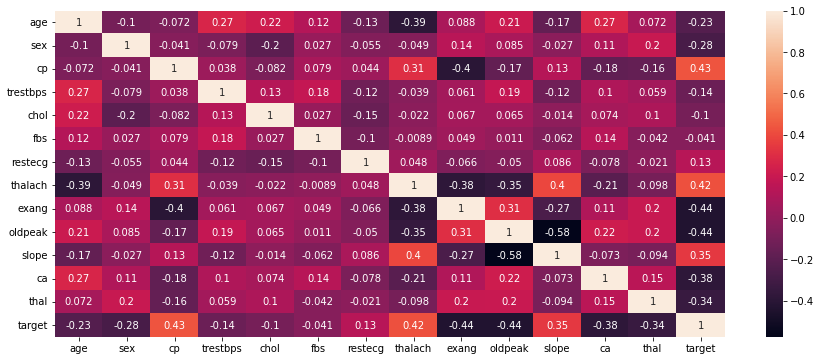

In [ ]:
# heatmap
plt.figure(figsize=(15,6))
sns.heatmap(data=df2.corr(), annot=True)

In [ ]:
# data=pd.DataFrame(df2)

Train test split

In [ ]:
X = df2.drop(['target'], axis = 1)
y = df2['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (717, 13)
Size of test set: (308, 13)


In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
479,58,1,0,128,216,0,0,131,1,2.2,1,3,3
227,44,0,2,118,242,0,1,149,0,0.3,1,1,2
910,50,1,2,140,233,0,1,163,0,0.6,1,1,3
362,43,0,2,122,213,0,1,165,0,0.2,1,0,2


Data scaling

In [ ]:
# importing major libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##Logistic Regression

In [ ]:
# Logistic Regression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
# Calculating the accuracy
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  80.84


##Gaussian Naive Bayes

In [ ]:
# Gaussian Naive Bayes

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
# Prediction on test set
y_pred = model.predict(X_test)

In [ ]:
# Calculating the accuracy
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes model : ', acc_nb )

Accuracy of Gaussian Naive Bayes model :  81.49


##Decision Tree

In [ ]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# # Hyperparameter Optimization
# parameters = {'max_features': ['log2', 'sqrt','auto'], 
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10, 50], 
#               'min_samples_split': [2, 3, 50, 100],
#               'min_samples_leaf': [1, 5, 8, 10]
#              }

# # Run the grid search
# grid_obj = GridSearchCV(clf, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# clf = grid_obj.best_estimator_

# # Train the model using the training sets 
# clf.fit(X_train, y_train)

In [ ]:
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy'],
              'max_depth': [5, 10, 25,35,50], 
              'min_samples_split': [10,20,30, 50, 100],
              'min_samples_leaf': [ 2,3,5]
             }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# Calculating the accuracy
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  90.58


In [ ]:
from sklearn.tree import plot_tree, export_text

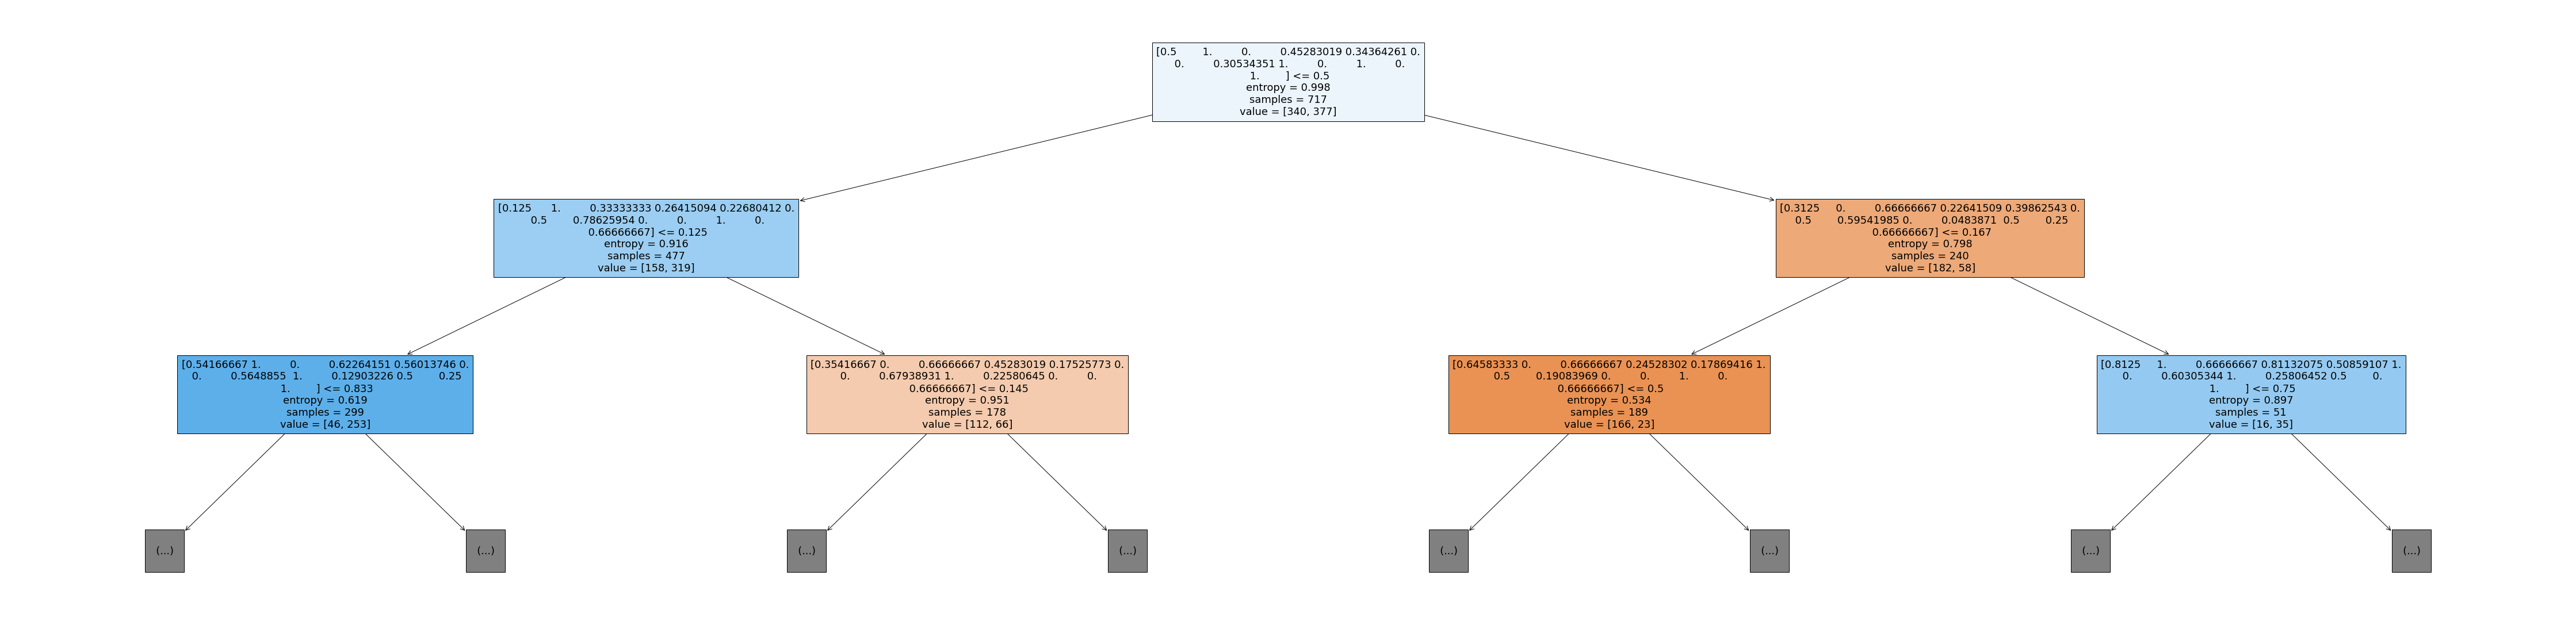

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(clf, feature_names=X_train, max_depth=2, filled=True);

In [ ]:
clf.tree_.max_depth

10

##Random Forest

In [ ]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=15, random_state=42)

In [ ]:
# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [5,10,20,30], 
              'min_samples_split': [10,20],
              'min_samples_leaf': [5, 8,10]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=15, random_state=42)

In [ ]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [ ]:
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

Accuracy of Random Forest model :  91.23


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[143  16]
 [ 11 138]]


In [ ]:
# Feature Importance in Python
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [ ]:
# using sklearning package feature_importances_
rf.feature_importances_

array([0.07647553, 0.03132715, 0.16135166, 0.05776167, 0.06693529,
       0.01360548, 0.02246883, 0.14108191, 0.04718845, 0.0911352 ,
       0.0514569 , 0.12746479, 0.11174714])

Text(0.5, 0, 'Feature Importance')

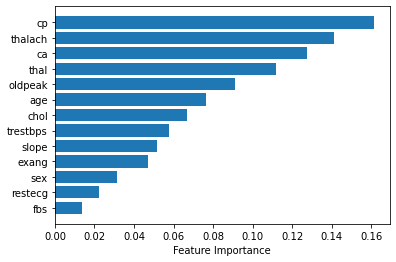

In [ ]:
# plotting feature importance in bar graph
sort = rf.feature_importances_.argsort()
plt.barh(df2.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [ ]:
# Permutation Based Feature Importance (with scikit-learn)
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

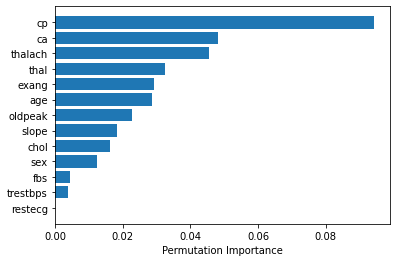

In [ ]:
# plotting permutation based feature importance 
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df2.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
shap.initjs()

In [ ]:
# Feature Importance Computed with SHAP Values
explainer =shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

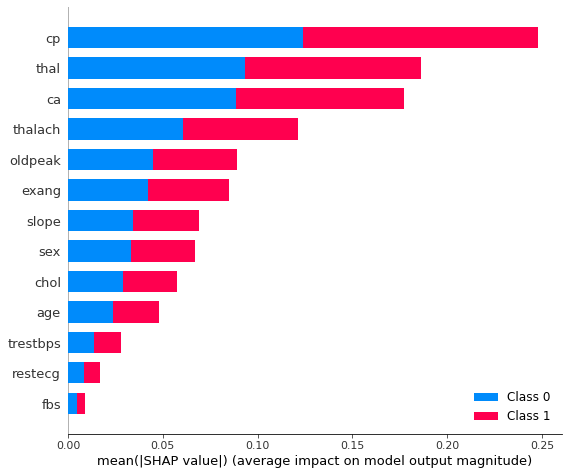

In [ ]:
shap.summary_plot(shap_values,features=X, feature_names=X.columns)


##Support Vector Machine

In [ ]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

In [ ]:
# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)

SVC(C=1000, gamma=0.001)

In [ ]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [ ]:
# Calculating the accuracy
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )

Accuracy of SVM model :  84.09


In [ ]:
df2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##K - Nearest Neighbors

In [ ]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

In [ ]:
k_range = list(range(1, 31))

In [ ]:
# Hyperparameter Optimization
parameters = {'n_neighbors': k_range, 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [5,10,20,30, 60]
             }

# Run the grid search
# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_obj = GridSearchCV(knn, parameters,cv =10, scoring ='accuracy')
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=5, n_neighbors=19, weights='distance')

In [ ]:
# Prediction on test data
y_pred = knn.predict(X_test)

In [ ]:
# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

Accuracy of KNN model :  100.0


In [ ]:
# knn is getting overfited

##Evaluation and comparision of all the models

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,K - Nearest Neighbors,100.00
3,Random Forest,91.23
2,Decision Tree,90.58
4,Support Vector Machines,84.09
1,Naive Bayes,81.49
0,Logistic Regression,80.84


In [ ]:
# Random forest is best fit model